# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Your code here. 
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

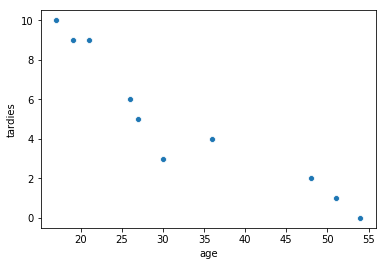

In [3]:
# Your code here.
'''
L.S. Good!
'''

sns.scatterplot(x="age", y="tardies", data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [32]:
# Your response here. 

'''
L.S. Correct! So there's a negative trend. 
'''

# Hypotheses: the older the student, the less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# correlation:
student_data.corr()

'''
L.S. Very good!
'''

# you can see that there is a strong negative correlation between age and tardies
# this means: the higher the age, the lower the tardies
# you can already say that there is a strong relationship (bevause it is already in scale)

'\nL.S. Very good!\n'

In [5]:
# covariance: 
student_data.cov()

# you can see that there is a negative relationshio between age and tardies
# this means: the higher the age, the lower the tardies
# you can not really say if there is a strong or weak relationship (it is not in scale)

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.

# tardies = b0 + b1*age
# dependent var = tardies 
# independent var = age 
# simple lineair regression: only 2 variables 

Plot your regression model on your scatter plot.

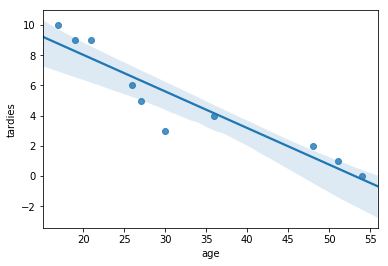

In [7]:
# Your code here.
'''
L.S. Very good!
'''

sns.regplot(x='age', y='tardies', data=student_data);

In [8]:
from scipy import stats

x = student_data['age']
y = student_data['tardies']

'''
L.S. Good!
'''

all_stats = stats.linregress(x, y)
all_stats

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

'''
L.S. Indeed!
'''

# the regression formula is: tardies = -0.24 + 12.89*age 
# the regression has a std. error of 0.031, which is a small error (std. error is from 1-0) 
# the smaller the std. error the better the model >> so age is a good predictor 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
'''
L.S. Be careful that you read a csv from a repo I can access. 
'''

import pandas as pd 
import seaborn as sns
vehicles = pd.read_csv('/Users/noortjetaal/Desktop/labs/data-labs/module-2/lab-matplotlib-seaborn/your-code/vehicles.csv') 

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
# Your response here. 
data = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
data.corr()

# fuel Barrels/Year has the highest correlation with CO2 emissions, so I think this will be the most important one
# year has the lowest correlation with CO2 emissions, so I think this will be give the least helpfull info 

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# the rest of the challange we will discuss next week (multiple regressions) >> said Jan 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 